In [68]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('SQL_Avia.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          360 non-null    int64  
 1   flight_no          360 non-null    object 
 2   actual_departure   360 non-null    object 
 3   actual_arrival     360 non-null    object 
 4   aircraft_code      360 non-null    object 
 5   departure_airport  360 non-null    object 
 6   arrival_airport    360 non-null    object 
 7   fare_conditions    360 non-null    object 
 8   total_seats        360 non-null    int64  
 9   sum_amount         360 non-null    float64
 10  ticket_count       360 non-null    int64  
 11  travel_time        360 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 33.9+ KB


In [70]:
df.head()

,flight_id,flight_no,actual_departure,actual_arrival,aircraft_code,departure_airport,arrival_airport,fare_conditions,total_seats,sum_amount,ticket_count,travel_time
0,136119,PG0252,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,733,AAQ,SVO,Business,12,402600.0,11,101.0
1,136119,PG0252,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,733,AAQ,SVO,Economy,118,1250400.0,102,101.0
2,136120,PG0252,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,733,AAQ,SVO,Business,12,402600.0,11,99.0
3,136120,PG0252,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,733,AAQ,SVO,Economy,118,1202800.0,98,99.0
4,136122,PG0252,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,733,AAQ,SVO,Business,12,366000.0,10,100.0


## Определяем наличие пропусков в данных

In [71]:
df.isnull().any()

flight_id            False
flight_no            False
actual_departure     False
actual_arrival       False
aircraft_code        False
departure_airport    False
arrival_airport      False
fare_conditions      False
total_seats          False
sum_amount           False
ticket_count         False
travel_time          False
dtype: bool

### Проверим столбец 'aircraft_code' на особенности данных:

In [72]:
display(df['aircraft_code'].value_counts())

SU9    180
733    180
Name: aircraft_code, dtype: int64

### Наблюдаем наличие двух самолетов (aircraft_code 733 и SU9), выполняющих рейрсы.

## Рассмотрим количество мест, по отношению к классу обслуживания:

<AxesSubplot:xlabel='aircraft_code,fare_conditions'>

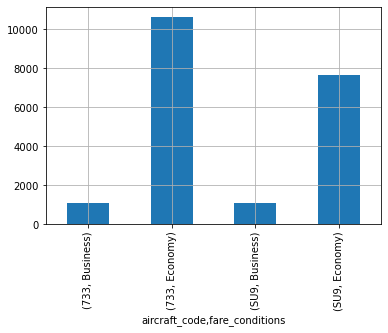

In [73]:
df.groupby(by = ['aircraft_code', 'fare_conditions'])['total_seats'].sum().plot(kind = 'bar', grid= True)

### На самолете кода 733, что сответствует согласно перечня Boeing 737-300, больше мест эконом класса, чем на SU9 (Sukhoi Superjet-100)

### Проверяем столбец рейсов:

In [74]:
display(df['flight_no'].value_counts())

PG0252    180
PG0480    180
Name: flight_no, dtype: int64

### Наблюдается два рейса в таблице данных по следующем направлениям:

In [75]:
display(df['arrival_airport'].value_counts())

SVO    180
EGO    180
Name: arrival_airport, dtype: int64

### Соответственно имеем два направления SVO - Москва и EGO - Белгород 

## Кол-во мест на рейсах:

<AxesSubplot:xlabel='aircraft_code,flight_no'>

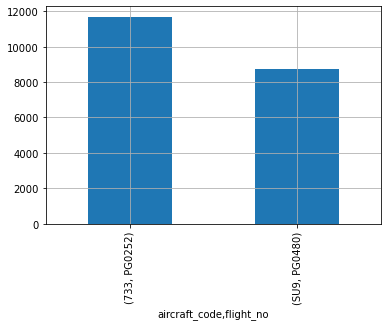

In [76]:
df.groupby(by = ['aircraft_code', 'flight_no'])['total_seats'].sum().plot(kind = 'bar', grid= True)

## Рассмотрим соотношение проданных билетов к классу обслуживания:

<AxesSubplot:xlabel='aircraft_code,fare_conditions'>

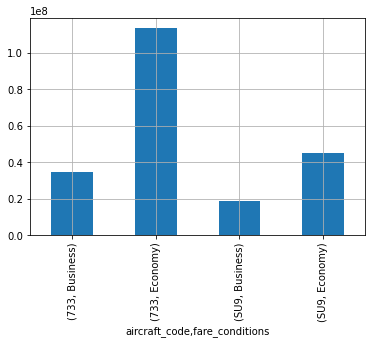

In [96]:
df.groupby(by = ['aircraft_code', 'fare_conditions'])['sum_amount'].sum().plot(kind = 'bar', grid= True)

## Рассмотрим среднюю загруженность самолетов:

<AxesSubplot:xlabel='aircraft_code,fare_conditions,total_seats'>

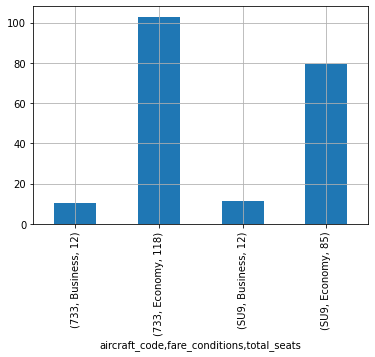

In [98]:
df.groupby(by = ['aircraft_code', 'fare_conditions', 'total_seats'])['ticket_count'].mean().plot(kind = 'bar', grid= True)

## Решение задачи с прибыльностью рейсов.

### Новая колонка по расходу топлива. Boeing 737-300 потребляет 2600 литров/час, а Sukhoi Superjet-100 - 1700 л./час:

In [78]:
fuel = {'733': 2600, 'SU9': 1700}
df['fuel_hour'] = df['aircraft_code'].map(fuel)

In [79]:
df['travel_time']=df['travel_time']/60 # перевод времени в часы для расчета

### Добавим значение стоимости авиационного топлива за литр с НДС в декабре 2017 = 53 рубля

In [80]:
fuel_ltr = 53
df['fuel_ltr'] = fuel_ltr

### Расходы на топливо и прибыльность:

In [91]:
df['fuel_cons'] = round(df['travel_time']*(df['fuel_ltr']*df['fuel_hour']), 0)
df['profit'] = df['sum_amount'] - df['fuel_cons']

### Средняя прибыль за зимний период:

In [94]:
mean_profit = round(pd.DataFrame(df.groupby(['arrival_airport']).profit.mean()), 0)
mean_profit

,profit
arrival_airport,
EGO,281098.0
SVO,593859.0


## При оценке рентабельности рейсов не были учтены расходы на содержание и ремонт авиапарка и наземных служб компании. 

## На лицо убыточность рейсов из Анапы в зимний период.

df